In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Open Files

### Books

has metadata for each book (goodreads IDs, authors, title, average rating, etc.).

In [2]:
books = pd.read_csv('books.csv')
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


### Ratings

contains ratings and user id

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
ratings.shape

(5976479, 3)

### Book Tags

contains tags/shelves/genres assigned by users to books. Tags in this file are represented by their IDs.

In [5]:
book_tags = pd.read_csv('book_tags.csv')
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [6]:
book_tags.shape

(999912, 3)

### Tags

contains the tag_names corresponding to the tag_ids.

In [7]:
tags = pd.read_csv('tags.csv')
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [8]:
tags.shape

(34252, 2)

# Data Pre-Processing

### Books

In [9]:
books.shape

(10000, 23)

In [10]:
books.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

#### Handling missing data

In [12]:
books.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

In [13]:
books.dropna(inplace=True)
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [14]:
#after we dropped missing datas
books.shape

(7860, 23)

#### Handling duplicated books

In [15]:
#checking on duplicated book titles however they are not necessarily duplicated as they have different publication year
books[books.title.duplicated(keep=False)==True].sort_values('title')

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
348,349,11590,11590,3048937,211,450031063,9.780450e+12,Stephen King,1975.0,Salem's Lot,...,228680,246360,6167,2713,11724,57171,89196,85556,https://images.gr-assets.com/books/1327891565m...,https://images.gr-assets.com/books/1327891565s...
1291,1292,5413,5413,40802405,22,385516487,9.780386e+12,"Stephen King, Jerry N. Uelsmann",2005.0,'Salem's Lot The Illustrated Edition,...,72797,74725,482,460,1854,12040,24920,35451,https://images.gr-assets.com/books/1320478491m...,https://images.gr-assets.com/books/1320478491s...
6480,6481,384597,384597,1303332,24,571169341,9.780571e+12,Tom Stoppard,1993.0,Arcadia,...,15362,16149,749,291,713,2408,4948,7789,https://images.gr-assets.com/books/1463617930m...,https://images.gr-assets.com/books/1463617930s...
6104,6105,11866694,11866694,16823763,23,1401340873,9.781401e+12,Lauren Groff,2012.0,Arcadia,...,14622,16274,2444,471,1471,4757,6233,3342,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
578,579,197084,197084,1837885,44,1713221,9.780002e+12,P.D. Eastman,1960.0,Are You My Mother?,...,174204,177809,1864,3986,8065,31523,45916,88319,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
5786,5787,11566956,11566956,16507555,15,618982507,9.780619e+12,Alison Bechdel,2012.0,Are You My Mother?: A Comic Drama,...,18618,19688,2585,697,2193,5326,6382,5090,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7448,7449,6345193,6345193,6448995,44,805090800,9.780805e+12,Paul Auster,2009.0,Invisible,...,11706,13897,1093,243,1002,3988,5957,2707,https://images.gr-assets.com/books/1317063578m...,https://images.gr-assets.com/books/1317063578s...
5556,5557,18656055,18656055,26470742,39,316405345,9.780316e+12,"James Patterson, David Ellis",2014.0,Invisible,...,14518,18967,2006,268,705,3536,7704,6754,https://images.gr-assets.com/books/1403166141m...,https://images.gr-assets.com/books/1403166141s...
7461,7462,456,456,1128381,50,140178139,9.780140e+12,Paul Auster,1992.0,Leviathan,...,10002,11794,517,105,490,2684,5165,3350,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
3551,3552,91953,91953,680963,364,140431950,9.780140e+12,"Thomas Hobbes, C.B. Macpherson",1651.0,"Leviathan or The Matter, Forme and Power of a ...",...,26284,28699,505,850,2688,8639,9692,6830,https://images.gr-assets.com/books/1326788684m...,https://images.gr-assets.com/books/1326788684s...


### Ratings

In [16]:
ratings.shape

(5976479, 3)

In [17]:
ratings.describe()

,user_id,book_id,rating
count,5.976479e+06,5.976479e+06,5.976479e+06
mean,2.622446e+04,2.006477e+03,3.919866e+00
std,1.541323e+04,2.468499e+03,9.910868e-01
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.281300e+04,1.980000e+02,3.000000e+00
50%,2.593800e+04,8.850000e+02,4.000000e+00
75%,3.950900e+04,2.973000e+03,5.000000e+00
max,5.342400e+04,1.000000e+04,5.000000e+00


In [18]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   book_id  int64
 2   rating   int64
dtypes: int64(3)
memory usage: 136.8 MB


In [19]:
#checking for missing values
ratings.isnull().sum()

user_id    0
book_id    0
rating     0
dtype: int64

In [20]:
#checking for duplicated rows
duplicatedrows = ratings[ratings.duplicated()]
duplicatedrows

,user_id,book_id,rating


### Book Tags

In [21]:
book_tags.shape

(999912, 3)

In [22]:
book_tags.describe()

,goodreads_book_id,tag_id,count
count,9.999120e+05,999912.000000,999912.000000
mean,5.263442e+06,16324.527073,208.869633
std,7.574057e+06,9647.846196,3501.265173
min,1.000000e+00,0.000000,-1.000000
25%,4.622700e+04,8067.000000,7.000000
50%,3.948410e+05,15808.000000,15.000000
75%,9.378297e+06,24997.000000,40.000000
max,3.328864e+07,34251.000000,596234.000000


In [23]:
book_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   goodreads_book_id  999912 non-null  int64
 1   tag_id             999912 non-null  int64
 2   count              999912 non-null  int64
dtypes: int64(3)
memory usage: 22.9 MB


In [24]:
#checking for missing values
book_tags.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

### Tags

In [25]:
tags.shape

(34252, 2)

In [26]:
tags.describe()

,tag_id
count,34252.000000
mean,17125.500000
std,9887.845047
min,0.000000
25%,8562.750000
50%,17125.500000
75%,25688.250000
max,34251.000000


In [27]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tag_id    34252 non-null  int64 
 1   tag_name  34252 non-null  object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [28]:
#checking for missing values
book_tags.isnull().sum()

goodreads_book_id    0
tag_id               0
count                0
dtype: int64

# Data Visualisation

### Most Rated Books

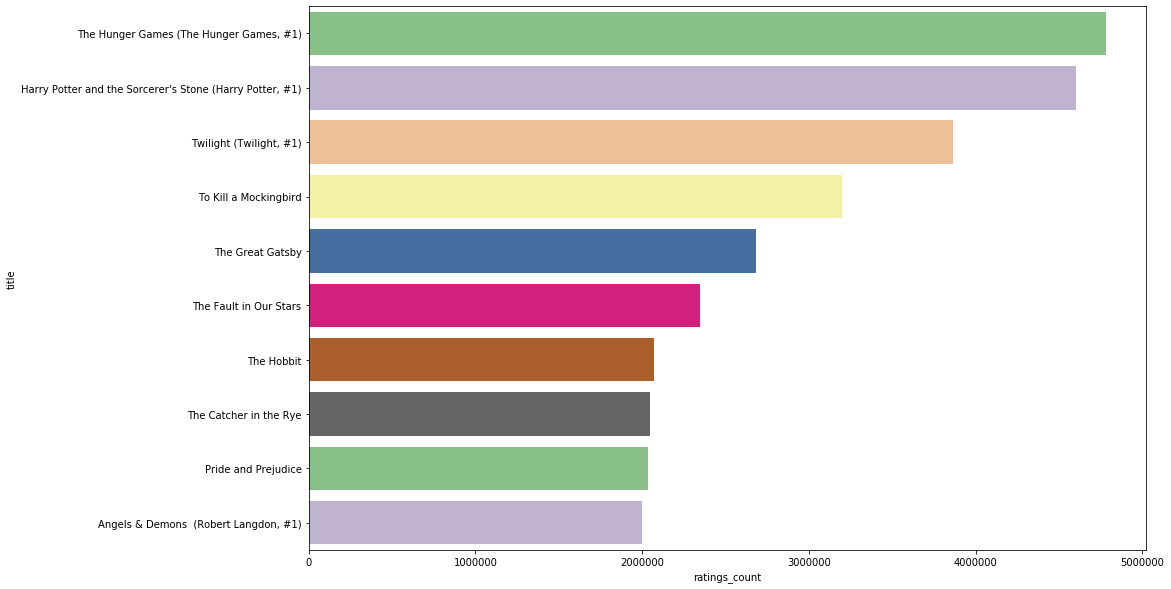

In [29]:
most_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(most_rated['ratings_count'], most_rated.index, palette='Accent')
plt.savefig('most_rated_books.png')

### Top Rated Books

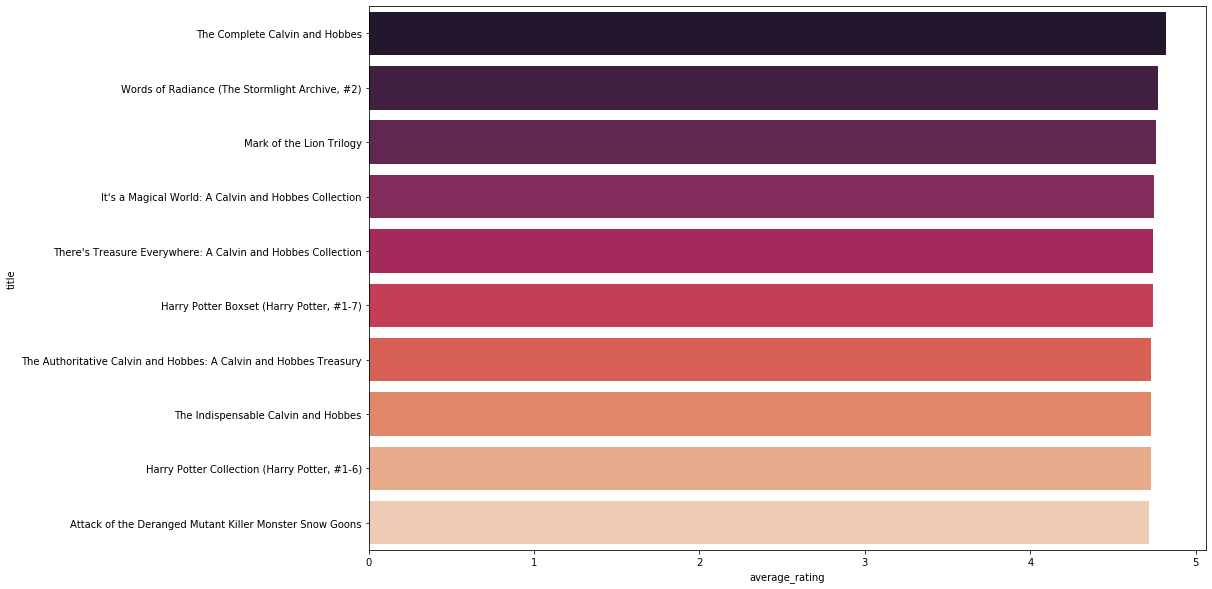

In [30]:
top_rated = books.sort_values('average_rating', ascending = False).head(10).set_index('title')
plt.figure(figsize=(15,10))
sns.barplot(top_rated['average_rating'], top_rated.index, palette='rocket')
plt.savefig('Top Rated Books.png')

### Authors with the most books

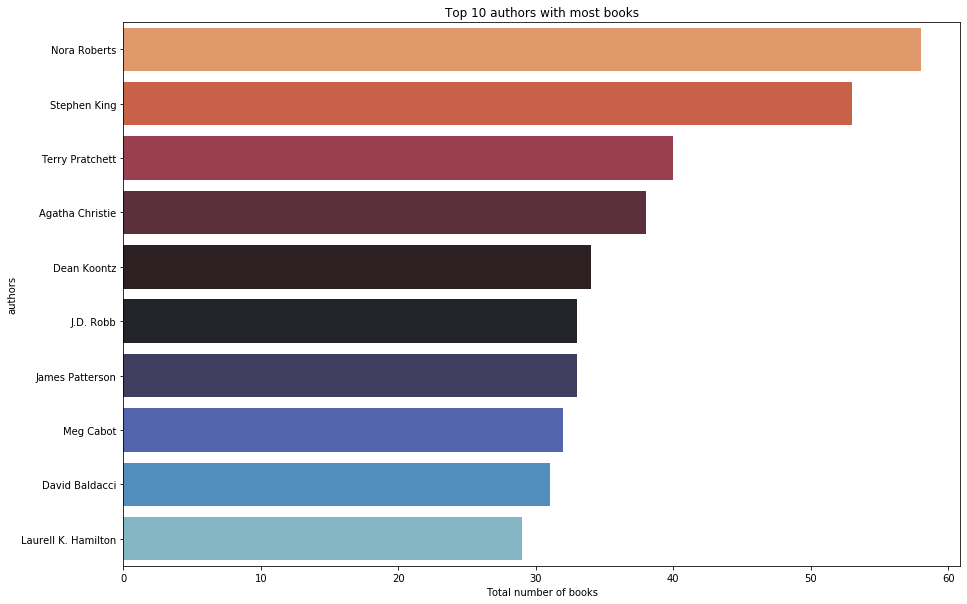

In [31]:
most_books = books.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='icefire_r')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
plt.savefig('Authors With The Most Books.png')

### Rating Distribution

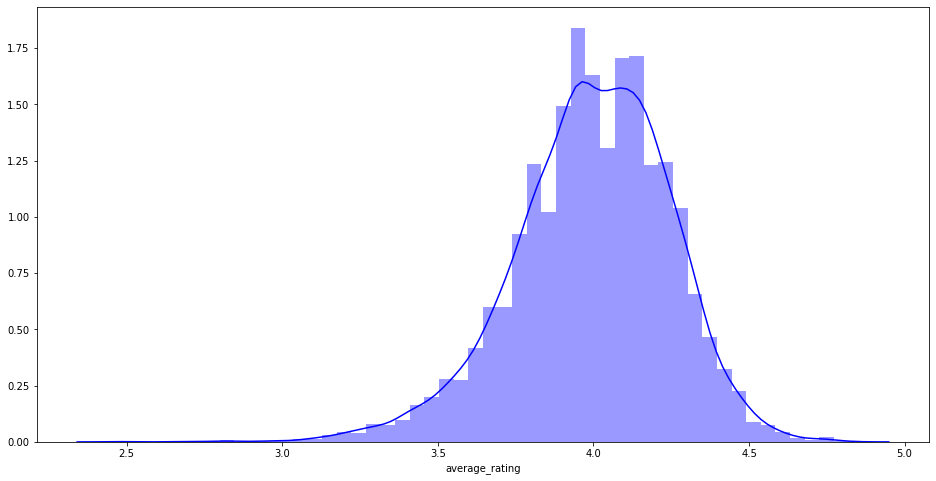

In [32]:
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='b')
plt.savefig('rating distribution.png')

### Number of Ratings Per Book

In [33]:
ratings_per_book = ratings.groupby('book_id')['book_id'].count()
ratings_per_book.head()

book_id
1    22806
2    21850
3    16931
4    19088
5    16604
Name: book_id, dtype: int64

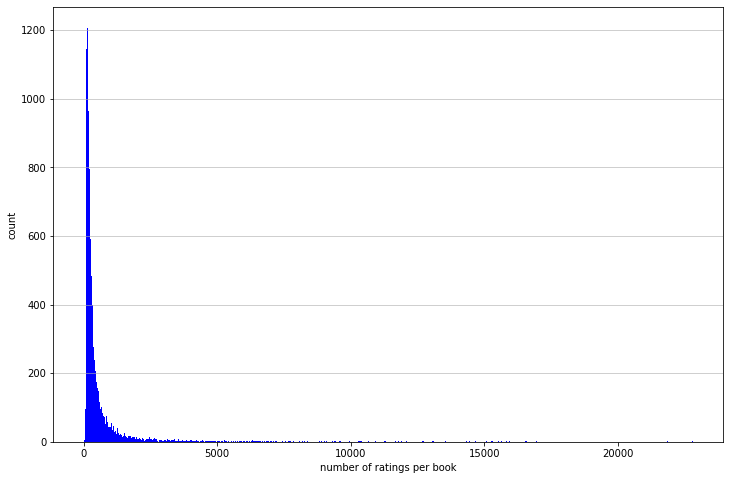

In [34]:
plt.figure(figsize=(12,8))
plt.hist(ratings_per_book ,bins='auto', color='blue');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('number of ratings per book')
plt.ylabel('count');
plt.savefig('number of ratings per book.png')

### Distribution of Books' Mean Ratings

In [35]:
mean_rating_per_book = ratings.groupby('book_id')['rating'].mean()
mean_rating_per_book.head()

book_id
1    4.279707
2    4.351350
3    3.214341
4    4.329369
5    3.772224
Name: rating, dtype: float64

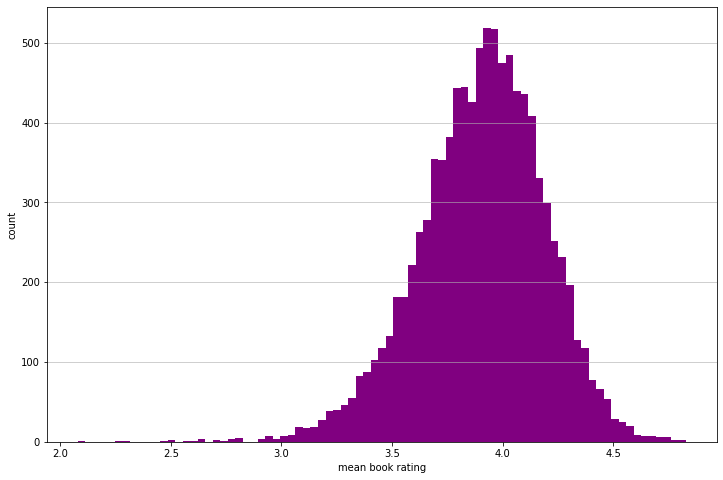

In [36]:
plt.figure(figsize=(12,8))
plt.hist(mean_rating_per_book, bins='auto', color='purple');
plt.grid(axis='y', alpha=0.75)
plt.xlabel('mean book rating')
plt.ylabel('count');
plt.savefig('distribution of mean ratings.png')

### Book Genres

In [37]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()
genres[:4]

['art', 'biography', 'business', 'chick lit']

In [38]:
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]

In [39]:
available_books_with_genres = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
available_books_with_genres.shape

(60573, 3)

In [40]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [41]:
tag_counts = pd.DataFrame(available_books_with_genres.groupby('tag_id')['count'].sum())
tag_counts.head()

,count
tag_id,
2938,30262
4605,172444
5951,73249
7077,53864
7457,1756920


In [42]:
tag_counts.set_index(available_genres.tag_name, inplace=True)
tag_counts.head()

,count
tag_name,
art,30262
biography,172444
business,73249
christian,53864
classics,1756920


In [43]:
tag_counts.sort_values('count', ascending=False, inplace=True)
tag_counts.head()

,count
tag_name,
fiction,3688819
fantasy,3548157
classics,1756920
romance,1231926
mystery,872282


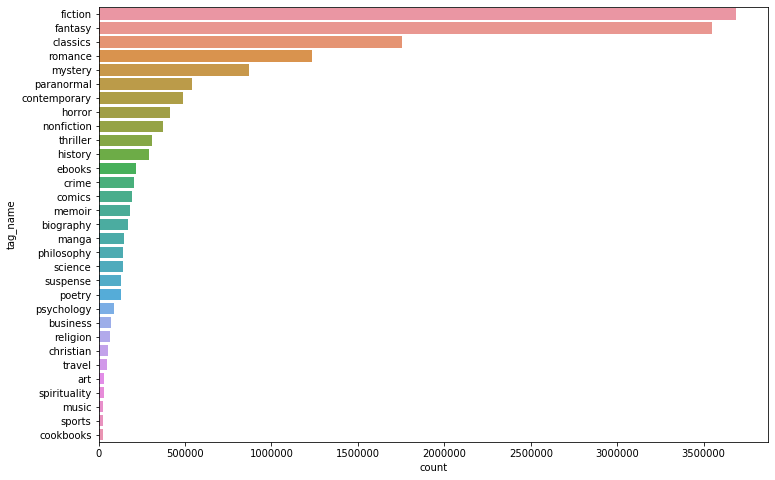

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(x='count', y=tag_counts.index, data=tag_counts, orient='h');
plt.savefig('book genres.png')

# Explaratory Data Analysis

### Correlation Heatmap

In [45]:
cols = ['books_count','original_publication_year','average_rating','ratings_count','work_text_reviews_count']
corr = books[cols].corr()
corr

,books_count,original_publication_year,average_rating,ratings_count,work_text_reviews_count
books_count,1.000000,-0.319806,-0.070159,0.332199,0.200861
original_publication_year,-0.319806,1.000000,0.019763,-0.023296,0.028412
average_rating,-0.070159,0.019763,1.000000,0.053507,0.013280
ratings_count,0.332199,-0.023296,0.053507,1.000000,0.784033
work_text_reviews_count,0.200861,0.028412,0.013280,0.784033,1.000000


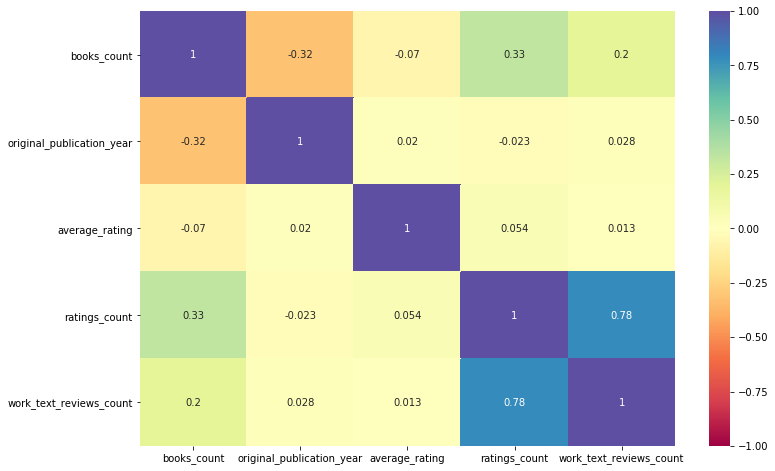

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, vmin = -1, vmax = 1, center = 0, cmap = 'Spectral', annot=True)
plt.savefig('correlation_heatmap')

### Relationship between the number of ratings & the average rating

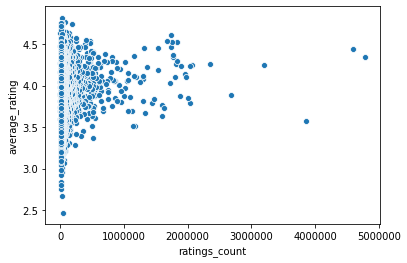

In [47]:
ax = sns.scatterplot(x="ratings_count", y="average_rating", data=books)
plt.savefig('ratings colleration.png')

#### correlation

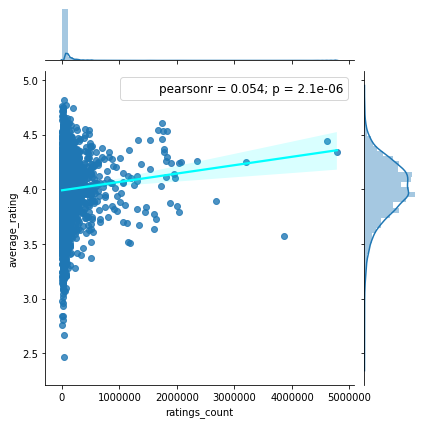

In [48]:
jp = sns.jointplot(x='ratings_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);
plt.savefig('pearson - ratings.png')

Theoretically, it might be that the popularity of a book (in terms of the number of ratings it receives) is associated with the average rating it receives, such that once a book is becoming popular it gets better ratings. However, our data shows that this is true only to a very small extent. The correlation between these variables is only 0.054.

### Multiple editions of each book

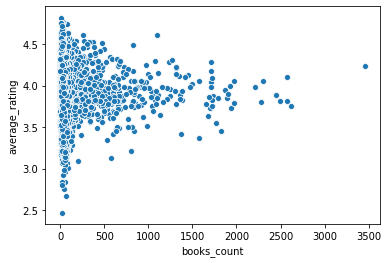

In [49]:
ax = sns.scatterplot(x="books_count", y="average_rating", data=books)

#### correlation

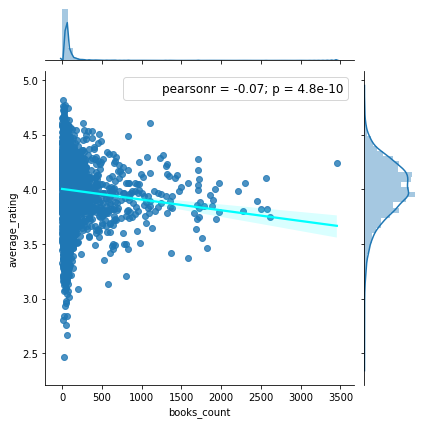

In [50]:
jp = sns.jointplot(x='books_count', y='average_rating', kind='reg', line_kws={'color':'cyan'}, data=books)
jp.annotate(stats.pearsonr, fontsize=12);
plt.savefig('multiple editions correlation.png')

The dataset contains information about how many editions of a book are available in books_count. These can either be different editions in the same language or also translations of the book into different languages. So one might assume, that the better the book is the more editions should be available. In fact, data show exactly the opposite pattern: The more editions a book has the lower is the average rating. The causal direction of this association is of course unclear here.

### Does book title length influence book ratings?

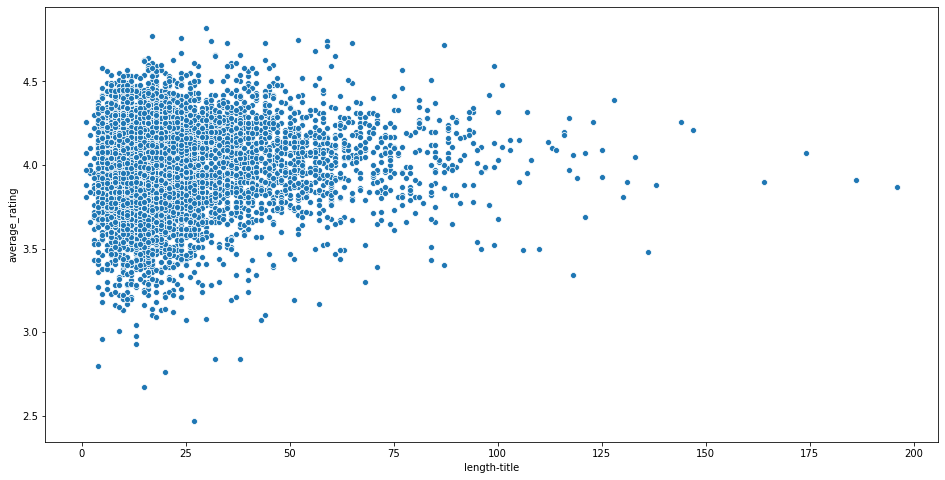

In [51]:
books['length-title']=books['original_title'].str.len()
plt.figure(figsize=(16,8))
sns.scatterplot(x=books['length-title'], y=books['average_rating'])
plt.savefig('title length.png')

So, the highly rated books have rather short titles. The graph shows that a straight line can be plotted but very approximately to say that as the length of title increases, the rating remains constant (at around 4).

### Does frequent rater rate books differently?

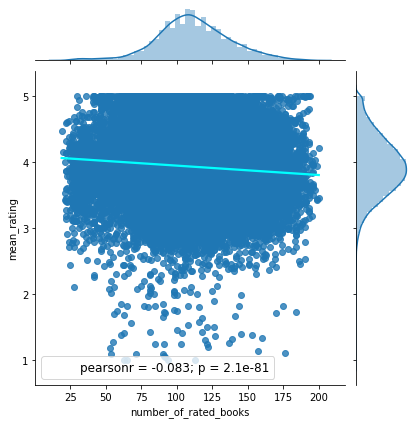

In [52]:
jp = sns.jointplot(x=ratings.groupby('user_id')['user_id'].count(),
                   y=ratings.groupby('user_id')['rating'].mean(),
                   kind='reg', line_kws={'color':'cyan'})
jp.annotate(stats.pearsonr, fontsize=12);
plt.xlabel('number_of_rated_books');
plt.ylabel('mean_rating');

It is possible, that users that rate more books (frequent raters) rate books differently from less frequent raters. The figure above explores this possibility. It seems like frequent raters tend to give lower ratings to books, maybe they are/become more critical the more they read and rate. That’s interesting

### Do books in book series receive higher rating?

In [53]:
book_series = books[books.title.str.contains('\(.*[,:]') == True][['title', 'average_rating']]
print('There are {} books that are in series'.format(book_series.shape[0]))

There are 3342 books that are in series


In [54]:
book_series.head()

,title,average_rating
0,"The Hunger Games (The Hunger Games, #1)",4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,4.44
2,"Twilight (Twilight, #1)",3.57
8,"Angels & Demons (Robert Langdon, #1)",3.85
11,"Divergent (Divergent, #1)",4.24


In [55]:
series = book_series.copy()
series['title'] = series['title'].str.findall('\(.*[,:]').apply(lambda x: x.pop()[1:-1])
series.head()

,title,average_rating
0,The Hunger Games,4.34
1,Harry Potter,4.44
2,Twilight,3.57
8,Robert Langdon,3.85
11,Divergent,4.24


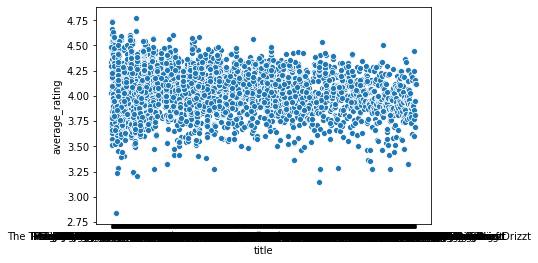

In [56]:
ax = sns.scatterplot(x="title", y="average_rating", data=series)

### Do books with translations have higher ratings?

# Machine Learning

## Collaborative Filtering

In [57]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors #unsupervise learning model, mencari tetangga terdekat

In [58]:
#merging data
data = pd.merge(books, ratings, on='book_id')
data.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,length-title,user_id,rating
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,2886,5
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,6158,5
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,3991,4
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,5281,5
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,5721,5


In [59]:
#merged data exploration - mean rating of all books 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
The Complete Calvin and Hobbes                                       4.829876
Attack of the Deranged Mutant Killer Monster Snow Goons              4.768707
The Indispensable Calvin and Hobbes                                  4.766355
There's Treasure Everywhere: A Calvin and Hobbes Collection          4.760456
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury    4.757202
It's a Magical World: A Calvin and Hobbes Collection                 4.747396
The Calvin and Hobbes Tenth Anniversary Book                         4.728528
The Days Are Just Packed: A Calvin and Hobbes Collection             4.722656
The Divan                                                            4.720000
The Way of Kings, Part 1 (The Stormlight Archive #1.1)               4.711765
Name: rating, dtype: float64

In [60]:
#merged data exploration - count the amount of rating of all books
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
The Hunger Games (The Hunger Games, #1)                        22806
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)       21850
To Kill a Mockingbird                                          19088
Twilight (Twilight, #1)                                        16931
The Great Gatsby                                               16604
Catching Fire (The Hunger Games, #2)                           16549
Mockingjay (The Hunger Games, #3)                              15953
Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)    15855
Harry Potter and the Chamber of Secrets (Harry Potter, #2)     15657
The Hobbit                                                     15558
Name: rating, dtype: int64

In [61]:
#rating values groupby book titles 
grouped_ratings= pd.DataFrame(data.groupby('title')['rating'].mean())
grouped_ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
grouped_ratings.head()

,rating,num_of_ratings
title,,
"Angels (Walsh Family, #3)",3.562738,263
'Salem's Lot,3.938868,4433
"'Tis (Frank McCourt, #2)",3.570413,703
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",3.838384,297
"100 Bullets, Vol. 1: First Shot, Last Call",3.617647,170


In [62]:
grouped_ratings.sort_values('num_of_ratings', ascending= False).head()

,rating,num_of_ratings
title,,
"The Hunger Games (The Hunger Games, #1)",4.279707,22806
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",4.351350,21850
To Kill a Mockingbird,4.329369,19088
"Twilight (Twilight, #1)",3.214341,16931
The Great Gatsby,3.772224,16604


### Recommendation based on correlation

In [63]:
booksmat = data.pivot_table(
    index = 'user_id',
    columns = 'title',
    values = 'rating'
).fillna(0)

booksmat.head()

title,"Angels (Walsh Family, #3)",'Salem's Lot,"'Tis (Frank McCourt, #2)","10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,100 Selected Poems,"10th Anniversary (Women's Murder Club, #10)","11 Birthdays (Willow Falls, #1)",11/22/63,...,أولاد حارتنا,باب الخروج: رسالة علي المفعمة ببهجة غير متوقعة,حوجن [Ḥawjan],ساق البامبو,سمفونی مردگان,شيكاجو,عقاید یک دلقک,في ديسمبر تنتهي كل الأحلام,キスよりも早く1 [Kisu Yorimo Hayaku 1] (Faster than a Kiss #1),美少女戦士セーラームーン新装版 1 [Bishōjo Senshi Sailor Moon Shinsōban 1]
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#rating record of liked books
liked_books = 'Dracula'
liked_books_ratings = booksmat[liked_books]
liked_books_ratings.head()

user_id
1    0.0
2    0.0
3    0.0
4    3.0
5    0.0
Name: Dracula, dtype: float64

In [65]:
#correlation 
similar_liked_books = booksmat.corrwith(liked_books_ratings)

In [66]:
#create dataframe
df_books_corr = pd.DataFrame(similar_liked_books, columns = ['Correlation'])
df_books_corr.dropna(inplace = True)
df_books_corr.head()

,Correlation
title,
"Angels (Walsh Family, #3)",-0.009332
'Salem's Lot,0.148328
"'Tis (Frank McCourt, #2)",-0.004846
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",-0.017199
"100 Bullets, Vol. 1: First Shot, Last Call",0.012927


In [67]:
# optional
df_books_corr = df_books_corr.join(grouped_ratings['num_of_ratings'])
df_books_corr.head()

,Correlation,num_of_ratings
title,,
"Angels (Walsh Family, #3)",-0.009332,263
'Salem's Lot,0.148328,4433
"'Tis (Frank McCourt, #2)",-0.004846,703
"10% Happier: How I Tamed the Voice in My Head, Reduced Stress Without Losing My Edge, and Found Self-Help That Actually Works",-0.017199,297
"100 Bullets, Vol. 1: First Shot, Last Call",0.012927,170


In [68]:
# book recommendation based on the highest correlatio
df_books_corr.sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Strange Case of Dr. Jekyll and Mr. Hyde,0.203251,2926
The Picture of Dorian Gray,0.199895,6406
The Strange Case of Dr. Jekyll and Mr. Hyde and Other Tales of Terror,0.196564,1046


In [69]:
# book recommendation based on the highest correlation with more than 5000 ratings 
df_books_corr[df_books_corr['num_of_ratings'] > 5000].sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Picture of Dorian Gray,0.199895,6406
The Shining (The Shining #1),0.165355,6861
"The Fellowship of the Ring (The Lord of the Rings, #1)",0.161577,12530


In [70]:
# book recommendation with correlation more than 0.2
df_books_corr[df_books_corr['Correlation'] > 0.2].sort_values('Correlation', ascending = False).iloc[1:].head()

,Correlation,num_of_ratings
title,,
Frankenstein,0.334256,7727
"Interview with the Vampire (The Vampire Chronicles, #1)",0.220112,5764
The Strange Case of Dr. Jekyll and Mr. Hyde,0.203251,2926


### Recommendation using Nearest Neighbor

In [71]:
df_books_pivot = data.pivot_table(
    index = 'book_id',
    columns = 'user_id',
    values = 'rating'
).fillna(0)

df_books_pivot.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,53415,53416,53417,53418,53419,53420,53421,53422,53423,53424
book_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
2,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,4.0
4,5.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,0.0,5.0,...,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,5.0,5.0
5,0.0,5.0,0.0,4.0,0.0,0.0,3.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,0.0,0.0


In [72]:
#books matrix
books_matrix = csr_matrix(df_books_pivot.values)
books_matrix

<7860x53424 sparse matrix of type '<class 'numpy.float64'>'
	with 5311817 stored elements in Compressed Sparse Row format>

In [73]:
#fitting model 
model= NearestNeighbors(metric='cosine', algorithm = 'brute')
model.fit(books_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [74]:
#book recommendation
book = 'Romeo and Juliet'
item_id = int(pd.DataFrame(data['book_id'][data['title'] == book]).iloc[0])

jarak, indeks = model.kneighbors(df_books_pivot.loc[item_id,:].values.reshape(1,-1), n_neighbors=11)

for i in range(0, len(jarak.flatten())):
    if i==0:
        print("Recommendation for '{0}': \n".format(data[data['book_id'] == item_id]['title'].tolist()[0]))
    else:
        print("{0}:'{1}', with distance: {2}".format(i, 
                                                   data[data['book_id'] == df_books_pivot.index[indeks.flatten()[i]]]['title'].iloc[0],
                                                   jarak.flatten()[i]
                                                  ))

Recommendation for 'Romeo and Juliet': 

1:'Hamlet', with distance: 0.5446055579484093
2:'Macbeth', with distance: 0.5499705087391189
3:'The Great Gatsby', with distance: 0.5505435126812175
4:'To Kill a Mockingbird', with distance: 0.5587650419497711
5:'The Adventures of Huckleberry Finn', with distance: 0.567469425854512
6:'Pride and Prejudice', with distance: 0.5695462000464738
7:'Lord of the Flies', with distance: 0.5737375277153554
8:'Of Mice and Men', with distance: 0.5827465175266584
9:'Animal Farm', with distance: 0.5878748701562182
10:'Little Women (Little Women, #1)', with distance: 0.5890437006003466


## Content-Based

#### merging titles, author, and genres/tag names

In [75]:
bgenres = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
bgenres.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [76]:
bg = pd.merge(books, bgenres , left_on='goodreads_book_id', right_on='goodreads_book_id', how='inner')
bg.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,length-title,tag_id,count,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,30574,11314,to-read
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,11305,10836,fantasy
2,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,11557,50755,favorites
3,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,8717,35418,currently-reading
4,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,33114,25968,young-adult


In [77]:
books_with_genres = pd.merge(bg, tag_counts, left_on='tag_name', right_on='tag_name', how='inner')
books_with_genres.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_3,ratings_4,ratings_5,image_url,small_image_url,length-title,tag_id,count_x,tag_name,count_y
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,11305,10836,fantasy,3548157
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,40,11305,47478,fantasy,3548157
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,8,11305,14288,fantasy,3548157
3,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,34,11305,41786,fantasy,3548157
4,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,16,11305,322,fantasy,3548157


### Content-Based Filtering Using TFidfVectorizer & CountVectorizer

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### TfidVectorizer

In [79]:
# author based recommender
tfidf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), min_df = 0, stop_words = 'english')
#tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(books['authors'])
tfidf_matrix.shape
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [80]:
#Construct a reverse map of indices and book titles
indices = pd.Series(books.index, index = books['title']).drop_duplicates()

In [81]:
# Function that takes in book titles as input and outputs most similar books
def get_recommendations(title, cosine_sim = cosine_sim):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    book_indices = [i[0] for i in sim_scores]
    return books['title'].iloc[book_indices]

In [82]:
books['title'].head(20)

0               The Hunger Games (The Hunger Games, #1)
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbit
7                                The Catcher in the Rye
8                 Angels & Demons  (Robert Langdon, #1)
9                                   Pride and Prejudice
10                                      The Kite Runner
11                            Divergent (Divergent, #1)
12                                                 1984
13                                          Animal Farm
14                            The Diary of a Young Girl
15     The Girl with the Dragon Tattoo (Millennium, #1)
16                 Catching Fire (The Hunger Games, #2)
17    Harry Potter and the Prisoner of Azkaban (

In [83]:
# tag based recommender
tfidf1 = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 3), min_df = 0, stop_words = 'english')
tfidf_matrix1 = tfidf1.fit_transform(books_with_genres['tag_name'].head(20000))
cosine_sim0 = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [84]:
# tag and author based recommender
temp_df = books_with_genres.groupby('book_id')['tag_name'].apply(' '.join).reset_index()
temp_df.head()

,book_id,tag_name
0,1,fantasy fiction romance contemporary thriller ...
1,2,fantasy fiction contemporary classics paranorm...
2,3,fantasy fiction contemporary paranormal horror
3,4,fiction contemporary classics mystery history ...
4,5,fiction romance ebooks classics


In [85]:
books0 = pd.merge(books, temp_df, on = 'book_id', how = 'inner')
books0.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,length-title,tag_name
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,fantasy fiction romance contemporary thriller ...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,40,fantasy fiction contemporary classics paranorm...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,8,fantasy fiction contemporary paranormal horror
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,21,fiction contemporary classics mystery history ...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,16,fiction romance ebooks classics


In [86]:
# function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [87]:
books0['authors'].apply(clean_data)

0                 suzannecollins
1       j.k.rowling,marygrandpré
2                 stepheniemeyer
3                      harperlee
4              f.scottfitzgerald
                  ...           
7855              hermanmelville
7856                ilonaandrews
7857                roberta.caro
7858              patricko'brian
7859              peggyorenstein
Name: authors, Length: 7860, dtype: object

In [88]:
def create_soup(x):
    return ''.join(x['authors']) + '' + ''.join(x['tag_name'])

In [89]:
books0['soup'] = books0.apply(create_soup, axis = 1)

#### CountVectorizer

In [90]:
cv = CountVectorizer(analyzer = 'word', ngram_range=(1, 3), min_df = 0, stop_words = 'english')
count_matrix = cv.fit_transform(books0['soup'])
cosine_sim1 = cosine_similarity(count_matrix, count_matrix)
books0.reset_index()

,index,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,...,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,length-title,tag_name,soup
0,0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,...,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,16,fantasy fiction romance contemporary thriller ...,Suzanne Collinsfantasy fiction romance contemp...
1,1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,...,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,40,fantasy fiction contemporary classics paranorm...,"J.K. Rowling, Mary GrandPréfantasy fiction con..."
2,2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,...,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,8,fantasy fiction contemporary paranormal horror,Stephenie Meyerfantasy fiction contemporary pa...
3,3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,...,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,21,fiction contemporary classics mystery history ...,Harper Leefiction contemporary classics myster...
4,4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,...,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,16,fiction romance ebooks classics,F. Scott Fitzgeraldfiction romance ebooks clas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855,7855,9995,15613,15613,2764239,199,1416523723,9.781417e+12,Herman Melville,1924.0,...,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,18,fiction classics history,Herman Melvillefiction classics history
7856,7856,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,...,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,10,fantasy fiction romance contemporary ebooks pa...,Ilona Andrewsfantasy fiction romance contempor...
7857,7857,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,...,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,16,classics history nonfiction biography,Robert A. Caroclassics history nonfiction biog...
7858,7858,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,...,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,21,fiction ebooks classics history,Patrick O'Brianfiction ebooks classics history


In [91]:
tfidf2 = TfidfVectorizer(analyzer = 'word', ngram_range=(1, 3), min_df = 0, stop_words = 'english')
tfidf_matrix2 = tfidf2.fit_transform(books0['soup'])
cosine_sim2 = linear_kernel(tfidf_matrix2, tfidf_matrix2)

In [92]:
print('Author-based recommendations:')
print(get_recommendations('The Great Gatsby'), '\n')
print('Tag-based recommendations:')
print(get_recommendations('The Great Gatsby', cosine_sim0), '\n')
print('Author and Tag based recommendations using CountVectorizer:')
print(get_recommendations('The Great Gatsby', cosine_sim1), '\n')
print('Author and Tag based recommendations using tf-idf:')
print(get_recommendations('The Great Gatsby', cosine_sim2))

Author-based recommendations:
1183                                  Tender Is the Night
2303                                This Side of Paradise
3640                  The Curious Case of Benjamin Button
7408                                    The Short Stories
1279                                           The Aeneid
922     The Alchemyst (The Secrets of the Immortal Nic...
1633    The Magician (The Secrets of the Immortal Nich...
2016    The Sorceress (The Secrets of the Immortal Nic...
2119    The Necromancer  (The Secrets of the Immortal ...
2446    The Warlock (The Secrets of the Immortal Nicho...
Name: title, dtype: object 

Tag-based recommendations:
1     Harry Potter and the Sorcerer's Stone (Harry P...
2                               Twilight (Twilight, #1)
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                                            The Hobbi

In [93]:
#print('author-based recommendations:')
#print(get_recommendations('Romeo and Juliet'), '\n')
#print('tag-based recommendations:')
#print(get_recommendations('Romeo and Juliet', cosine_sim0), '\n')
#print('author and tag based recommendations using CountVectorizer:')
#print(get_recommendations('Romeo and Juliet', cosine_sim1), '\n')
#print('author and tag based recommendations using TfidfVectorizer:')
#print(get_recommendations('Romeo and Juliet', cosine_sim2))

dict = {'CountVectorizer': [x for i,x in enumerate(get_recommendations('Romeo and Juliet', cosine_sim1))], 
        'TfidfVectorizer': [x for i,x in enumerate(get_recommendations('Romeo and Juliet', cosine_sim2))]}
results = pd.DataFrame(data = dict)
results

,CountVectorizer,TfidfVectorizer
0,Much Ado About Nothing,Much Ado About Nothing
1,The Taming of the Shrew,The Merchant of Venice
2,As You Like It,Measure for Measure
3,Twelfth Night,The Taming of the Shrew
4,Measure for Measure,As You Like It
5,Hamlet,Twelfth Night
6,The Merchant of Venice,Hamlet
7,"Anne of the Island (Anne of Green Gables, #3)",A Midsummer Night's Dream
8,"Women in Love (Brangwen Family, #2)","Absolute Fear (New Orleans, #4)"
9,The Blue Castle,"Between, Georgia"


# Saving Model

In [94]:
#nearest neighbors
import joblib
joblib.dump(model, 'model_NN')

['model_NN']

In [95]:
books_with_genres.to_csv('books_with_genres.csv')